In [259]:
import helper as hp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

# 1.1

In [260]:
my_var = 13
task_1_1 = '1.1'
task_1_2 = '1.2'

In [261]:
df_1 = hp.get_data(task_1_1, hp.get_tasks_var(my_var))
df_2 = hp.get_data(task_1_2, hp.get_tasks_var(my_var))

In [262]:
df_1

,A5,A6,A8
0,454,382,382
1,686,560,508
2,533,494,415
3,612,507,498
4,442,369,350
...,...,...,...
1068,408,340,349
1069,535,431,439
1070,441,383,383
1071,403,348,315


In [263]:
def calc(data):
    return pd.DataFrame({'Среднее': np.mean(data), 
                         'Выб. дисперсия': np.var(data), 
                         'Выб. ср.кв откл.': np.std(data), 
                         'Выб. коэф. асимм.': stats.skew(data), 
                         'Выб. эксцесс': stats.kurtosis(data)})

In [264]:
calc(df_1)

,Среднее,Выб. дисперсия,Выб. ср.кв откл.,Выб. коэф. асимм.,Выб. эксцесс
A5,526.483691,13855.931001,117.711219,0.678649,0.530443
A6,420.041938,4953.143628,70.378574,0.348148,0.175817
A8,428.032619,8209.962589,90.608844,0.819141,0.975748


# 1.2

In [265]:
df_2

,A8
0,382
1,508
2,415
3,498
4,350
...,...
1068,349
1069,439
1070,383
1071,315


In [ ]:
print("Анализируемый признак:", list(df_2.columns))
print("Объем выборки:", df_2.size)

Формула Скотта (Scott, 1979)

  h=3.5sn^{-1/3},   
где h — Ширина интервала (теоритическая), s — выборочное стандартное отклонение 

In [1]:
def Scotts_formula(n, s):
    return 3.5*s*n**(-1/3)
Scotts_formula(1073, 90.60)

30.973931581816124

In [267]:
def get_intrvls():
    h = float(Scotts_formula(df_2.size, np.std(df_2)))
    num_of_groups = math.ceil(df_2.size/h)
    true_len_intrvl = round(df_2.size/num_of_groups, 0)
    return true_len_intrvl, num_of_groups
    

In [268]:
n = 20
l =  df_2.size/n
print("Число групп:", n)
print("Ширина интервала:", l)

Число групп: 20
Ширина интервала: 53.65


In [269]:
border = [l*i for i in range(n+1)]
intrvls = []
for i in range(len(border)-1):
    t = (border[i], border[i+1])
    intrvls.append(t)

In [270]:
borders = pd.DataFrame(intrvls)
borders

,0,1
0,0.00,53.65
1,53.65,107.30
2,107.30,160.95
3,160.95,214.60
4,214.60,268.25
5,268.25,321.90
6,321.90,375.55
7,375.55,429.20
8,429.20,482.85
9,482.85,536.50


In [271]:
def table_freqs(col_n):
    frq = df_2.groupby(pd.cut(df_2[col_n], border)).count() #Частота
    rel_frq = round(frq / (df_2.size * l), 5)
    cumul_frq = pd.DataFrame(frq.cumsum())
    rel_cumul_frq = round(cumul_frq / df_2.size, 3)
    
    frq.columns = ['Частота']
    rel_frq.columns = ['Отн. частота']
    cumul_frq.columns = ['Накоп. частота']
    rel_cumul_frq.columns = ['Отн. накоп. частота']
    
    data = pd.concat([frq, rel_frq.reindex(frq.index), cumul_frq.reindex(frq.index),
                     rel_cumul_frq.reindex(frq.index), ], axis=1)
    data.index.names = ['Интервал']
    
    return data


In [272]:
frq_table = table_freqs('A8')

In [273]:
frq_table

,Частота,Отн. частота,Накоп. частота,Отн. накоп. частота
Интервал,,,,
"(0.0, 53.65]",0,0.00000,0,0.000
"(53.65, 107.3]",0,0.00000,0,0.000
"(107.3, 160.95]",0,0.00000,0,0.000
"(160.95, 214.6]",0,0.00000,0,0.000
"(214.6, 268.25]",8,0.00014,8,0.007
"(268.25, 321.9]",92,0.00160,100,0.093
"(321.9, 375.55]",239,0.00415,339,0.316
"(375.55, 429.2]",265,0.00460,604,0.563
"(429.2, 482.85]",203,0.00353,807,0.752


In [274]:
def get_coord_means_of_intrvls(data, y_label):
    x_coord = (borders[1] - borders[0])/2 + borders[0]
    y_coord = frq_table[y_label]
    return x_coord, y_coord

In [286]:
def gstgrm(data, bns, cumul, boo, x_label, y_label, title):
    data.hist(bins=borders[0], cumulative=cumul, normed=boo, color='#008080')
    plt.xlabel(x_label, labelpad=10, weight='bold', size=10)
    plt.ylabel(y_label, labelpad=10, weight='bold', size=10)
    plt.title(title, pad=10, weight='bold', size=12)
    x_poly, y_poly = get_coord_means_of_intrvls(data, y_label)
    plt.plot(x_poly, y_poly, color='#ED2540')
    plt.show()

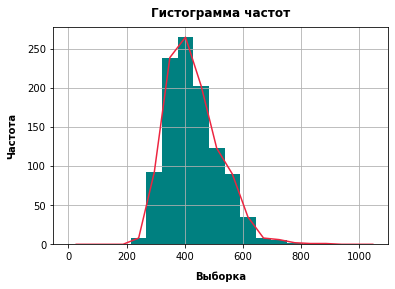

In [287]:
gstgrm(df_2, 0, 0, False, "Выборка", "Частота", "Гистограмма частот")

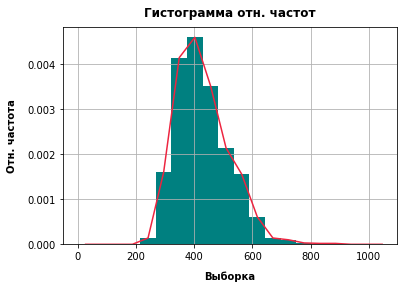

In [288]:
gstgrm(df_2, 0, 0, True, "Выборка", "Отн. частота", "Гистограмма отн. частот")

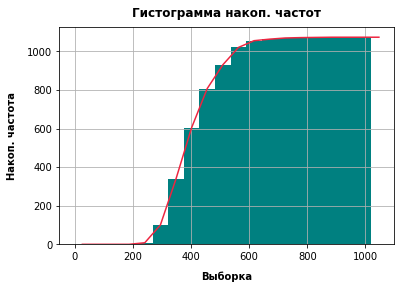

In [289]:
gstgrm(df_2, 20, 1, False, "Выборка", "Накоп. частота", "Гистограмма накоп. частот")

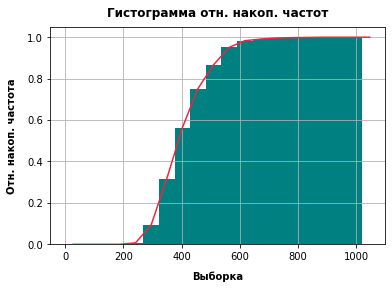

In [290]:
gstgrm(df_2, 20, 1, True, "Выборка", "Отн. накоп. частота", "Гистограмма отн. накоп. частот")

In [386]:
def get_cdf():
    j = 0
    x_coord = borders
    y_coord = list(frq_table['Отн. накоп. частота'])
    plt.title('Эмпирическая функция распределения', pad=10, weight='bold', size=12)
    for i in range(n):
        plt.plot([borders[0][i], borders[1][i]], [y_coord[i], y_coord[i]], color='#8F3CED', marker = "<")
        plt.plot([borders[0][i], borders[0][i]], [y_coord[i], y_coord[0]], "--", color='#ED2540', linewidth=0.5)
        j += 1

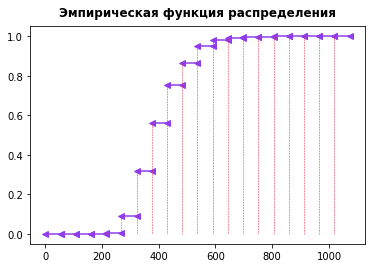

In [387]:
get_cdf()